In [103]:
from pygsp.graphs import Bunny
import numpy as np
import matplotlib.pyplot as plt
from src.ri_distances.pnt_cloud_generation import generate_rotation_matrix
from functools import lru_cache


In [104]:
@lru_cache(maxsize=None)
def get_bunny_coord(keep_factor=1.0):
    data = Bunny().coords
    keep_factor = 1
    n_samples = int(data.shape[0] * keep_factor)

    data = np.random.permutation(data)[:n_samples]
    Q = generate_rotation_matrix(theta=4.8,axis=np.array([1,0,0]))
    # P =  generate_rotation_matrix(theta=0.3,axis=np.array([-0.4,1.0,1.0]))
    data_rot = data @ Q
    return data_rot

In [151]:
def plot_bunny(bunny_data,ax,color=None,label=None):
    ax.scatter3D(bunny_data[:,0],bunny_data[:,1],bunny_data[:,2], marker='o',
                   s=5, cmap='RdBu_r', vmin=-0.03, vmax=0.03,color=color,label=label)
    ax.legend()

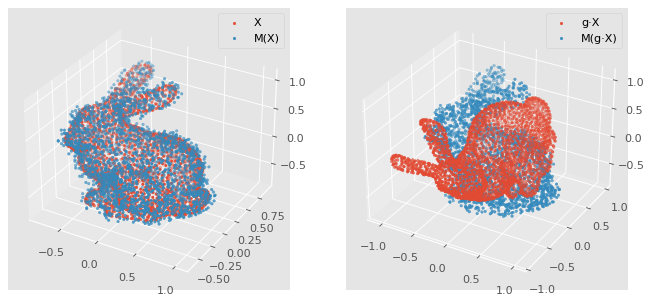

In [158]:
keep_factor = 0.6
bunny = get_bunny_coord(keep_factor=keep_factor)
noise = np.random.randn(*bunny.shape) * 0.04
Q = np.array([[-0.0469317 ,  0.71129176,  0.70132835],
       [-0.92819778,  0.22838904, -0.29374706],
       [-0.36911557, -0.66475746,  0.64950074]])
noisy_bunny = bunny + noise
rotated_bunny = bunny @ Q
fig, axes = plt.subplots(1,2, subplot_kw={'projection': '3d'},figsize=(10,5))

plot_bunny(bunny,axes[0],label='X')
plot_bunny(noisy_bunny,axes[0],label='M(X)')
plot_bunny(rotated_bunny,axes[1],label='g·X')
plot_bunny(noisy_bunny,axes[1],label='M(g·X)')